# Оглавление


* [Научные вычисления в Python](#scicalc)
    * [numpy](#numpy)
        * [Создание массива](#create_array)
        * [Операции над одномерными массивами](#array_operations)
        * [Индексация массивов](#array_indexing)
        * [Двумерные массивы](#2D_array)
    * [matplotlib](#matplotlib)
        * [Аннотирование графиков](#annotate)
        * [Трехмерная линия](#3DLine)
        * [Опционально](#mpll_additional)
    * [scipy](#scipy)
        * [Оптимизация](#scipy_optimize)
        * [Интегрирование](#scipy_integrate)
        * [Дифференциальные уравнения](#scipy_odes)
* [Стилистические рекомендации](#style_guide)

# Научные вычисления в Python <a class="anchor" id="scicalc"></a>

<h3><a href="http://scipy.org/">Документация по numpy и scipy</a></h3>
<br>

## numpy <a class="anchor" id="numpy"></a>
Работа с $N-$мерными массивами данных.

Элементы массива $-$ одного типа (однородные).

Если задачу можно решить, произведя некоторую последовательность операций над массивами, то это будет столь же эффективно, как в C или matlab $-$ бОльшая часть времени тратится в библиотечных функциях, написанных на C.

<strong>Преимущества numpy-массива (array) перед Python list:</strong>

1. Используют меньше памяти
2. Обладают значительно большей функциональностью
3. Требуют однородности данных

In [1]:
import numpy as np

### Создание массива <a class="anchor" id="create_array"></a>
 
Массив на основе данных, которые передаются в конструктор

In [2]:
a = np.array([-1,0,1,2])
a, type(a)

(array([-1,  0,  1,  2]), numpy.ndarray)

print печатает массивы в удобной форме:

In [3]:
print(a)

[-1  0  1  2]


Узнать форму массива (возвращается кортеж размеров):

In [4]:
a.shape

(4,)

Число измерений:

In [5]:
a.ndim

1

size - это полное число элементов в массиве; len - размер по первой координате (в 1-мерном случае это то же самое).

In [ ]:
a.size


In [ ]:
len(a)

конвертация в Python список

In [ ]:
b = a.tolist()
type(b)

Двумерный массив из списка:

In [7]:
array2 = np.array([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])
# A = np.arange(9).reshape(3,3)
print(array2)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [8]:
array2.shape

(3, 3)

Нельзя вставлять или удалять элементы в произвольном месте, но элементы можно изменять!

Индексация - обычная:

In [9]:
array2[1]

array([4, 5, 6])

In [10]:
array2[1] = [10,10,10]
array2

array([[ 1,  2,  3],
       [10, 10, 10],
       [ 7,  8,  9]])

Можно использовать в цикле for:

In [11]:
for i in array2:
    print(i)
# почему это не очень хорошо?

[1 2 3]
[10 10 10]
[7 8 9]


### Правильное <a href="https://docs.scipy.org/doc/numpy/reference/arrays.nditer.html">итерирование</a>

nditer - multi-dimensional iterator object

Nditer Iteration Order - ___C___ (C order) or ___F___ (Fortran order)

In [12]:
for i in np.nditer(array2):
    print(i, end = ' ')

1 2 3 10 10 10 7 8 9 

In [13]:
A = np.arange(9).reshape(3,3)
for i in np.nditer(A, order='C'):
    print(i, end=' ')   

0 1 2 3 4 5 6 7 8 

In [16]:
for i in np.nditer(A, order='F'):
    print(i, end=' ')

0 3 6 1 4 7 2 5 8 

<h4>Изменение NumPy массивов</h4>

___Nditer___ считает (обрабатывает) элементы массива как readonly

In [19]:
for cell in np.nditer(A):
    cell[1] = cell*2

ValueError: assignment destination is read-only

In [30]:
for cell in np.nditer(A, op_flags=['readwrite']):
    cell[...] =cell*2
A

array([[  0,  32,  64],
       [ 96, 128, 160],
       [192, 224, 256]])

Итерирование по двум массивам одновременно

In [35]:
S = np.arange(3)
S

for a,s in np.nditer([A,S]):
    print(a, s)

0 0
32 1
64 2
96 0
128 1
160 2
192 0
224 1
256 2


### Массив чисел с плавающей точкой:

In [36]:
array_float0 = np.array([0., 2, 1])
array_float0, array_float0.dtype

(array([0., 2., 1.]), dtype('float64'))

можно в явном виде указать при создании

In [37]:
array_float1 = np.array([0,2,1],dtype=np.float64)
array_float0, array_float0.dtype

(array([0., 2., 1.]), dtype('float64'))

можно через специальный метод __astype__

In [38]:
arr_int = np.array([0,2,1],dtype=np.int64)
print(arr_int.dtype)
arr_int = arr_int.astype(np.float64)
print(arr_int)
print(arr_int.dtype)

int64
[0. 2. 1.]
float64


Массив, значения которого вычисляются функцией:

In [39]:
np.fromfunction?

In [43]:
np.fromfunction(lambda i, j: i + j, (3, 5), dtype=np.int64)

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6]])

### Массивы специального вида, часто используемые при вычислениях:

In [47]:
I = np.identity(4) #единичная матрица
print(I)


[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [48]:
I.shape

(4, 4)

In [49]:
A = np.zeros((3,4))
print(A)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [50]:
ones = np.ones(3,dtype=np.int64)
print(ones)

[1 1 1]


In [51]:
full = np.full((3,3), 5)
print(full)

[[5 5 5]
 [5 5 5]
 [5 5 5]]


**empty** , unlike **zeros** , does not set the array values to zero, and may therefore be marginally faster. On the other hand, it requires the user to manually set all the values in the array, and should be used with caution.

In [52]:
np.empty?

In [54]:
empty_matrix = np.empty((3,3)) 

# Array of uninitialized (arbitrary) data of the given shape, dtype, and
#    order.  Object arrays will be initialized to None.
print(empty_matrix)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Аналог **range** из стандартной библиотеки $-$ функция **arange**. 

Аргументы могут быть с плавающей точкой (в отличие от стандартного **range**)! 

**NB:** Следует избегать ситуаций, когда $\cfrac{конец−начало}{шаг} \in \mathbb{Z}$, потому что в этом случае включение последнего элемента зависит от ошибок округления.

In [55]:
x = np.arange(-10, 11, 2)
x

array([-10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8,  10])

In [56]:
x.dtype

dtype('int64')

In [57]:
x = np.arange(0.,9,2)
print(x)

[0. 2. 4. 6. 8.]


In [58]:
x.dtype

dtype('float64')

### Функция **linspace**

Последовательности чисел с постоянным шагом. 

Начало и конец диапазона включаются; последний аргумент - число точек.

In [59]:
y = np.linspace(-10, 10, 11)
y

array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.])

Последовательность чисел с постоянным шагом по логарифмической шкале от  $10^0$ до $10^1$.

In [63]:
b = np.logspace(0,1,5)
print(b)

[ 1.          1.77827941  3.16227766  5.62341325 10.        ]


Массив случайных чисел:

In [62]:
from numpy.random import random, normal
print(random(5))

[0.55722108 0.65702796 0.15293097 0.62291436 0.1484948 ]


Случайные числа с нормальным (гауссовым) распределением (среднее 0, среднеквадратичное отклонение 1).

In [64]:
print(normal(size=5))

[ 1.14706795  1.02057213 -0.00634197 -0.34208002 -0.09009802]


In [70]:
array = np.random.randint(-10, 10, 12)
array

array([ 2,  3,  5, -1,  7,  5,  1, -6,  8,  6,  9,  4])

In [67]:
np.random.randint?

### Функции агрегаты

In [68]:
np.mean?

In [71]:
print(array.max())

print(array.min())
# Compute the arithmetic mean along the specified axis.
print(array.mean())
print(array.sum())
# Returns the standard deviation of the array elements along given axis.
print(array.std())
# Compute the median along the specified axis.
# Returns the median of the array elements.
print(np.median(array))

9
-6
3.5833333333333335
43
4.009537241239803
4.5


## Операции над одномерными массивами <a class="anchor" id="array_operations"></a>

Арифметические операции проводятся поэлементно

In [144]:
a = np.array([-1,0,1,2])
b = np.array([7,-2,-3,1])
print(a+b)
print(a-b)
print(a*b)

[ 6 -2 -2  3]
[-8  2  4  1]
[-7  0 -3  2]


Скалярное произведение:

In [76]:
a@b

-8

In [77]:
print(a / b)
print(b**2)

[-0.14285714 -0.         -0.33333333  2.        ]
[49  4  9  1]


In [79]:
a,b

(array([-1,  0,  1,  2]), array([ 7, -2, -3,  1]))

In [80]:
# скалярное произведение
a.dot(b)

-8

In [81]:
np.dot(a, b)

-8

In [82]:
# векторное произведение
np.cross(a, b)

ValueError: incompatible dimensions for cross product
(dimension must be 2 or 3)

Когда операнды разных типов, они пиводятся к большему типу (больший тип?).

In [83]:
i = np.ones(4,dtype = np.float64)
print(a + i)

[0. 1. 2. 3.]


### Универсальные функции 

___NumPy___ содержит элементарные функции, которые тоже применяются к массивам поэлементно.

Они называются универсальными функциями (ufunc): sqrt, sin, cos, log, exp

In [84]:
np.sin, type(np.sin)

(<ufunc 'sin'>, numpy.ufunc)

In [85]:
print(np.sin(a))

[-0.84147098  0.          0.84147098  0.90929743]


Один из операндов может быть скаляром, а не массивом:

In [86]:
print(a+1)
print(2*b)

[0 1 2 3]
[14 -4 -6  2]


Сравнения дают булевы массивы:

In [87]:
print(a > b)
print(a == b)
c = a >= 2
print(c)

[False  True  True  True]
[False False False False]
[False False False  True]


Есть кванторы "существует" и "для всех".
Удобно проверять наличие 0 (или если вдруг все элементы 0):

In [143]:
np.any(c), np.all(c)

(True, False)

Модификация на месте:

In [90]:
a += 1
print(a)

[1 2 3 4]


In [94]:
a // 4

array([0, 0, 0, 1])

<a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.true_divide.html">True divide</a> - Returns a true division of the inputs, element-wise.

In [142]:
a = np.true_divide(a, 4)
a

array([[0.75, 1.  ],
       [0.5 , 0.75]])

In [96]:
b*=2
print(b)

[14 -4 -6  2]


In [146]:
b/=a # просто b/a не получится
print(b)

UFuncTypeError: Cannot cast ufunc 'divide' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [145]:
a+=1
a

array([0, 1, 2, 3])

При выполнении операций над массивами деление на 0 не возбуждает исключения, а даёт значения _np.nan_ или _np.inf_

In [147]:
print(np.array([0.0,0.0,1.0,-1.0])/np.array([1.0,0.0,0.0,0.0]))

[  0.  nan  inf -inf]


/var/folders/25/hkg7hrfn7130z9vkbc1z1h580000gn/T/ipykernel_5523/1384058646.py:1: RuntimeWarning: divide by zero encountered in divide
  print(np.array([0.0,0.0,1.0,-1.0])/np.array([1.0,0.0,0.0,0.0]))
/var/folders/25/hkg7hrfn7130z9vkbc1z1h580000gn/T/ipykernel_5523/1384058646.py:1: RuntimeWarning: invalid value encountered in divide
  print(np.array([0.0,0.0,1.0,-1.0])/np.array([1.0,0.0,0.0,0.0]))


In [136]:
np.nan+1, np.inf+1, np.inf*0, 1./np.inf, np.inf/np.inf

(nan, inf, nan, 0.0, nan)

In [137]:
np.nan==np.nan, np.inf==np.inf

(False, True)

Функция **sort** возвращает отсортированную копию, метод **sort** сортирует на месте.

In [148]:
print(np.sort(b))
print(b)

[-3 -2  1  7]
[ 7 -2 -3  1]


In [149]:
b.sort()
print(b)
print(a)

[-3 -2  1  7]
[0 1 2 3]


Объединение массивов:

In [152]:
a = np.hstack((a,b))
print(a)
b = np.hstack((b,b))
print(b)

[ 0  1  2  3 -3 -2  1  7 -3 -2  1  7 -3 -2  1  7 -3 -2  1  7]
[-3 -2  1  7 -3 -2  1  7 -3 -2  1  7 -3 -2  1  7]


Расщепление массива в позициях pos1 и pos2:

In [153]:
pos1 = 2 
pos2 = 6
np.hsplit(a,[pos1,pos2])

[array([0, 1]),
 array([ 2,  3, -3, -2]),
 array([ 1,  7, -3, -2,  1,  7, -3, -2,  1,  7, -3, -2,  1,  7])]

In [154]:
a = np.random.randint(-10, 10, 14)
print(a)
np.array_split(a, 3)

[-1  7  6  8 -3  2  8  6  4  3 -3  5  9  3]


[array([-1,  7,  6,  8, -3]), array([2, 8, 6, 4, 3]), array([-3,  5,  9,  3])]

Функции **delete**, **insert** и **append** не меняют массив на месте, а возвращают новый массив, в котором удалены, вставлены в середину или добавлены в конец какие-то элементы.

In [155]:
a = np.delete(a, [3,6])
print(a)

[-1  7  6 -3  2  6  4  3 -3  5  9  3]


In [156]:
a = np.insert(a, 2, [111,222])
print(a)

[ -1   7 111 222   6  -3   2   6   4   3  -3   5   9   3]


In [ ]:
a = np.append(a, [1,2,3])
print(a)

### Индексация массивов  <a class="anchor" id="array_indexing"></a>

In [157]:
a = np.linspace(0,1,11)
b=a[2:5]
b



array([0.2, 0.3, 0.4])

Срезы

In [158]:
b=a[2:6]
print(b)

[0.2 0.3 0.4 0.5]


In [160]:
b[0]=-0.2
print(b)
print(a)

[-0.2  0.3  0.4  0.5]
[ 0.   0.1 -0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


In [163]:
b=a[1:10:2]
print(b)
b=a[len(a):0:-1]
print(b)
b[2:5] = 0

[0.1 0.3 0.5 0.7 0.9]
[ 1.   0.9  0.8  0.7  0.6  0.5  0.4  0.3 -0.2  0.1]


Подмассиву можно присвоить значение $-$ массив правильного размера или скаляр:

In [164]:
a

array([ 0. ,  0.1, -0.2,  0.3,  0.4,  0.5,  0. ,  0. ,  0. ,  0.9,  1. ])

In [165]:
a[1:10:3] = 0
print(a)

[ 0.   0.  -0.2  0.3  0.   0.5  0.   0.   0.   0.9  1. ]


In [168]:
# Тут опять создаётся только новый заголовок, указывающий на те же данные.
b = a[:]
b[1] = -1
print(a)

[ 0.  -1.  -0.2  0.3  0.   0.5  0.   0.   0.   0.9  1. ]


In [169]:
b = a.copy()
b[2] = 0
print(b)
print(a)

[ 0.  -1.   0.   0.3  0.   0.5  0.   0.   0.   0.9  1. ]
[ 0.  -1.  -0.2  0.3  0.   0.5  0.   0.   0.   0.9  1. ]


### Отборы (фильтрация)

In [170]:
a

array([ 0. , -1. , -0.2,  0.3,  0. ,  0.5,  0. ,  0. ,  0. ,  0.9,  1. ])

In [171]:
a[(a > 0.5)]

array([0.9, 1. ])

In [172]:
a[(a > -5) & (a < a.mean())]

array([ 0. , -1. , -0.2,  0. ,  0. ,  0. ,  0. ])

In [173]:
# список индексов
print(a[[2,3,5]])

[-0.2  0.3  0.5]


In [174]:
print(a[np.array([2,3,5])])

[-0.2  0.3  0.5]


### Матрицы и двумерные массивы  <a class="anchor" id="2D_array"></a>

In [131]:
a = np.array([[0.0,1.0],[-1.0,0.0]])
print(a)

[[ 0.  1.]
 [-1.  0.]]


Атрибуту shape можно присвоить новое значение $-$ кортеж размеров по всем координатам. Получится новый заголовок массива; его данные не изменятся.

In [175]:
b = np.linspace(0,3,4)
b.shape

(4,)

In [176]:
b.shape=2,2
print(b)


[[0. 1.]
 [2. 3.]]


In [177]:
# размерность
print(b.ndim)
# форма массива
print(b.shape)
b

2
(2, 2)


array([[0., 1.],
       [2., 3.]])

С помощью random и randint тоже можно создавать двумерные (и многомерные) массивы (трехмерные + тензоры)

In [178]:
array = np.random.randint?

In [ ]:
array = np.random.randint

In [ ]:
array = np.random.randint

In [179]:
array = np.random.randint(-5, 5, (2,6), np.int64)
array

array([[-1,  4, -1,  2,  3,  1],
       [-1,  3,  3, -2,  3, -2]])

In [180]:
array.reshape(3,4)

array([[-1,  4, -1,  2],
       [ 3,  1, -1,  3],
       [ 3, -2,  3, -2]])

Можем изменить не форму, а размер:

In [181]:
array = np.resize(array, (2,3))
array

array([[-1,  4, -1],
       [ 2,  3,  1]])

Поэлементное и матричное умножение:

In [182]:
a = np.random.randint(2, 4, (2,2), np.int64)
b = np.random.randint(-2, 2, (2,2), np.int64)
print(a)
print(b)

[[2 3]
 [3 3]]
[[-2 -1]
 [-2  1]]


In [183]:
# поэлементное
print(a*b)
# матричное
print(a@b)
print(b@a)

[[-4 -3]
 [-6  3]]
[[-10   1]
 [-12   0]]
[[-7 -9]
 [-1 -3]]


Умножение матрицы на вектор

In [184]:
v = np.array([1,-1], dtype=np.float64)
print(b@v)

[-1. -3.]


In [185]:
print(v@b)

[ 0. -2.]


Внешнее произведение  $a_{ij} = u_i v_j$

In [196]:
u = np.linspace(6,2,3)
print(u)
print(v)
v = np.linspace(2,4,3)
aij = np.outer(u,v)
print(aij)

[6. 4. 2.]
[2. 3. 4.]
[[12. 18. 24.]
 [ 8. 12. 16.]
 [ 4.  6.  8.]]


**Axis** $-$ оси.

* 0 $-$ ось строк
* 1 $-$ ось столбцов

In [197]:
matrix_delete = np.random.randint(0, 10, (4,5))
matrix_delete

array([[2, 3, 7, 9, 6],
       [5, 6, 9, 4, 3],
       [4, 5, 2, 3, 2],
       [9, 1, 8, 3, 9]])

In [198]:
# удаление строки c индексом 2
np.delete(matrix_delete, 2, axis=0)

array([[2, 3, 7, 9, 6],
       [5, 6, 9, 4, 3],
       [9, 1, 8, 3, 9]])

In [199]:
# удаление столбца c индексом 2
np.delete(matrix_delete, 2, axis=1)

array([[2, 3, 9, 6],
       [5, 6, 4, 3],
       [4, 5, 3, 2],
       [9, 1, 3, 9]])

In [200]:
# максимум в каждом столбце
matrix_delete.max(axis=0)

array([9, 6, 9, 9, 9])

In [201]:
a, b

(array([[2, 3],
        [3, 3]]),
 array([[-2, -1],
        [-2,  1]]))

Конкатенация $-$ Join a sequence of arrays along an existing axis.
```python
    concatenate((a1, a2, ...), axis=0, out=None)
```

In [202]:
# добавим b к a как столбцы
concat_matrix_сol = np.concatenate((a, b), axis=1)
concat_matrix_сol

array([[ 2,  3, -2, -1],
       [ 3,  3, -2,  1]])

In [203]:
# добавим b к a как строки
concat_matrix_str = np.concatenate((a, b), axis=0)
concat_matrix_str

array([[ 2,  3],
       [ 3,  3],
       [-2, -1],
       [-2,  1]])

### Индексация

Строка:

In [204]:
I = np.eye(4)
print(I)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [205]:
print(I[1])

[0. 1. 0. 0.]


Цикл по строкам:

In [206]:
for row in I:
    print(row)

[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]


Столбец:

In [207]:
print(I[:2, 2])

[0. 0.]


Подматрица:

In [ ]:
print(I[0:2,1:3])

In [ ]:
I[1:, 2:] = 10
print(I)

### Специальные операции
Транспонированная матрица:

In [ ]:
print(b.T)

в массив

In [ ]:
b

In [ ]:
b.flatten()

Соединение матриц по горизонтали и по вертикали:

In [2]:
import numpy as np

In [3]:

a = np.array([[0,1],[2,3]])
b = np.array([[4,5,6],[7,8,9]])
c = np.array([[4,5],[6,7],[8,9]])

In [4]:
print(np.hstack((a,b)))

[[0 1 4 5 6]
 [2 3 7 8 9]]


In [5]:
print(np.vstack((a,c)))

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


sum - сумма всех элементов; 

sum(0) - суммы столбцов; 

sum(1) - суммы строк

prod, max, min - аналогично

In [6]:
b.sum(), b.sum(0), b.sum(1)

(39, array([11, 13, 15]), array([15, 24]))

In [7]:
np.trace(a) # <- сумма диагональных элементов

3

## linalg

In [8]:
a = np.array([[0,1],[2,3]])

In [9]:
# обратная матрица
np.linalg.inv(a)

array([[-1.5,  0.5],
       [ 1. ,  0. ]])

In [10]:
# определитель
np.linalg.det(a)

-2.0

In [11]:
# ранг
np.linalg.matrix_rank(a)

2

In [12]:
# собственные числа и вектора (можно и по отдельности)
eigenvals, eigenvectors = np.linalg.eig(a)
print(eigenvals)
print(eigenvectors)

[-0.56155281  3.56155281]
[[-0.87192821 -0.27032301]
 [ 0.48963374 -0.96276969]]


In [13]:
#eigenvectors[0] - это не собственный вектор!
v1 = eigenvectors[:, 0]
v1
a@v1

array([ 0.48963374, -0.2749552 ])

In [14]:
eigenvals[0] * v1

array([ 0.48963374, -0.2749552 ])

### работа с файлами из numpy

In [15]:
np.loadtxt?

In [17]:
np.genfromtxt?

In [18]:
np.savetxt?

## matplotlib  <a class="anchor" id="matplotlib"></a>
<br>

<font size="4">[Документация по matplotlib](https://matplotlib.org/)</font> - визуализация данных  


<font size="4">[Официальный туториал](https://matplotlib.org/users/pyplot_tutorial.html)</font>


Есть и другие пакеты...

Мы будем использовать подпакет `pyplot`. Он содержит простые функции для построения графиков, похожие на аналогичные функции в Matlab.

```python
%matplotlib inline
# графики встраиваются в блокнот в виде статического изображения
%matplotlib
# в отдельном окне
```



При необходимости, можно переключить формат, в котором выводятся графики. 

- растровые (png, jpg),
- векторные (eps, pdf, svg)

Векторные форматы позволяют сохранить качество при масштабировании и печати, но требуют больше ресурсов. По умолчанию используется растровый формат png

```python
%config InlineBackend.figure_format = 'svg' #векторный формат #векторный формат
```

__Для серьёзной трёхмерной визуализации данных лучше пользоваться более мощными специализированными системами.__

In [19]:
import matplotlib.pyplot as plt
# pip install git+https://github.com/garrettj403/SciencePlots
plt.style.use(['science','grid','notebook'])

OSError: 'science' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

Давайте оформим график!

In [20]:
x = np.linspace(-10, 10, 20)
y = x**3

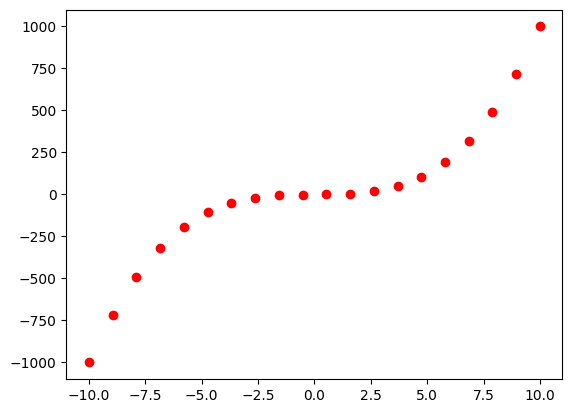

In [21]:
plt.plot(x, y, 'ro')
plt.show()

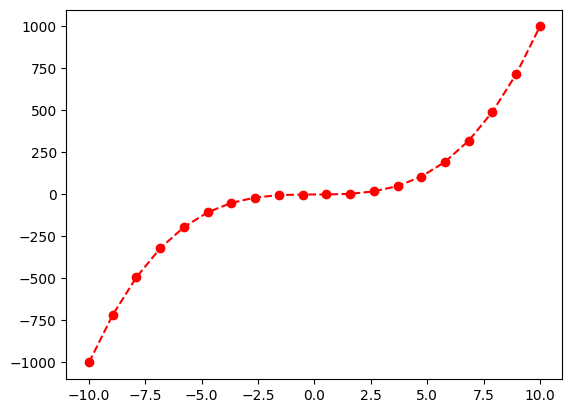

In [22]:
# Сокращенная форма для указания параметров графика
plt.plot(x, y, 'ro--')

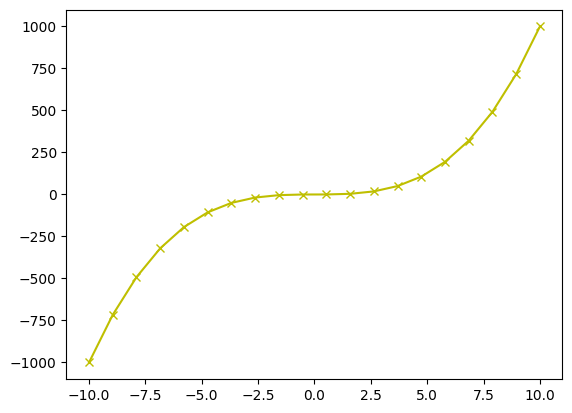

In [27]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'yx-')

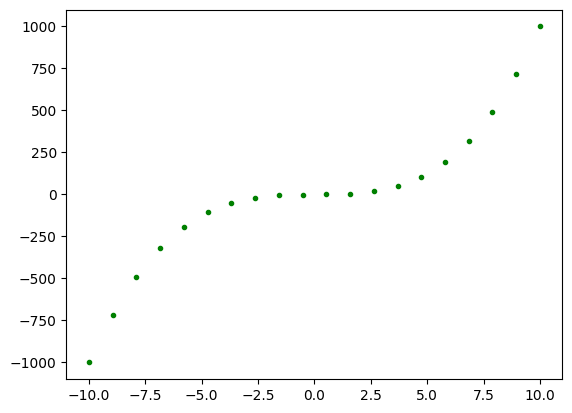

In [28]:
plt.plot(x, y, 'g.')

[]

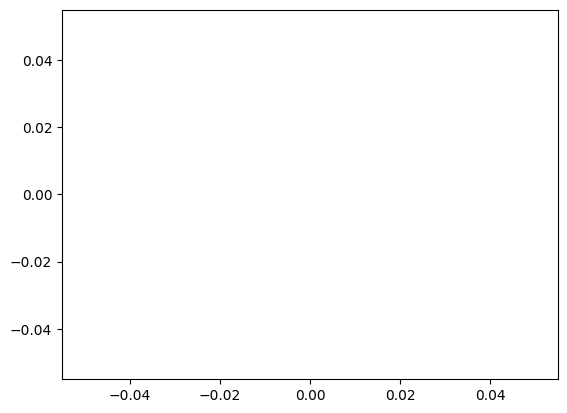

In [29]:
plt.plot() #<-Shift+Tab

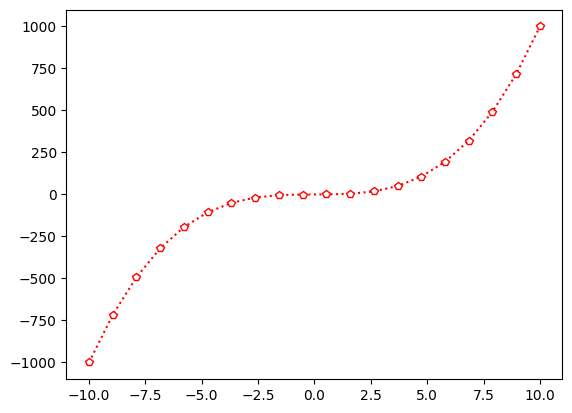

In [40]:
plt.plot(x, y, color='red', marker='p', linestyle='dotted', markerfacecolor='white');

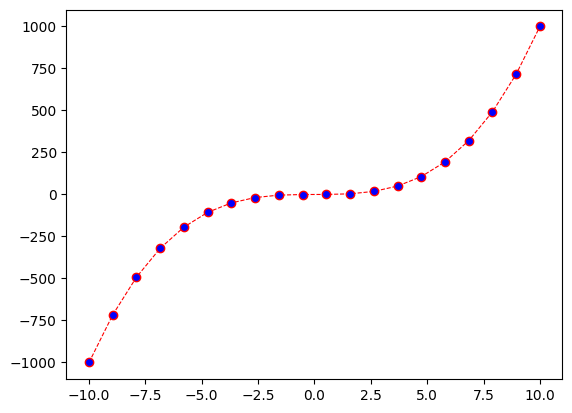

In [53]:
plt.plot(x, y, color='red', marker='o', linestyle='--', markerfacecolor='blue', lw=0.8);

Для оформления графиков можно использовать LaTeX (в title, label, ...). 

Чтобы проблем не было, ставьте `r` перед строкой с формулой (чтобы не было конфликтов с интерпретатором Python)

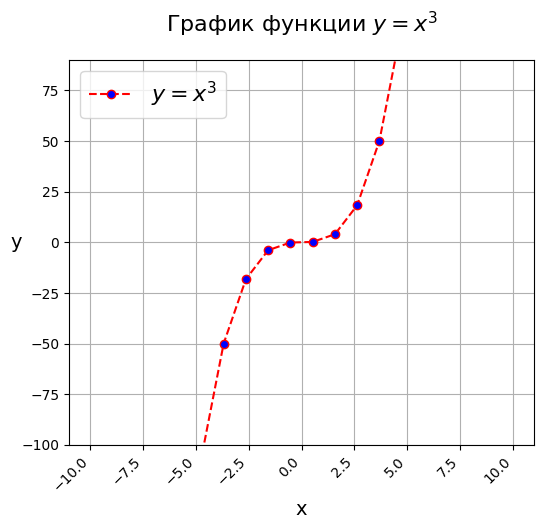

In [63]:
from matplotlib.pyplot import plot, grid, legend, xlabel, ylabel, ylim, title, xticks, figure

# можно поиграться с размером figure
figure(figsize=(6, 5))
plot(x, y, color='red', marker='o', linestyle='--', markerfacecolor='blue', label=r'$y = x ^3$');
grid() # сетка
legend(loc='best', fontsize=16);

#Подписи для осей:
xlabel('x', fontsize=14)
# повернём подпись на 90 градусов
ylabel('y', fontsize=14, rotation=0)
xticks(rotation=45, ha='right')

#Диапазон оси y:
ylim(-100, 90)

#Заголовок:
title(r'График функции $y = x ^3 $', fontsize=16, y=1.05);

### [Аннотирование графиков](http://matplotlib.org/users/annotations_guide.html) <a class="anchor" id="annotate"></a>


- text() - текстовые пояснения на графиках можно выводить с помощью функции. 
- annotate() - позволяет создавать более сложные аннотации, например, со стрелками, указывающими на определенную область графика. 
- axhline(), axvline() - горизонтальные и вертикальные опорные линии.

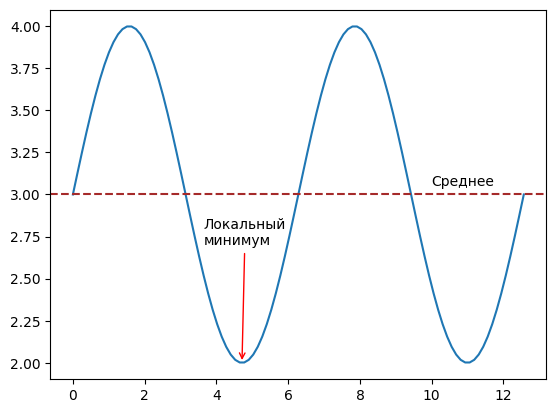

In [71]:
from matplotlib.pyplot import axhline, text, annotate
 
t = np.linspace(0., 4 * np.pi, 101)
f = np.sin(t) + 3
plt.plot(t,f)

axhline(3,color='brown',linestyle='--')
text(10, 3.05, 'Среднее')
annotate('Локальный\nминимум', xy=(3 * np.pi / 2, 2), 
             xytext=(3.65, 2.7),
             arrowprops=dict(arrowstyle='->', color='red'));

### Трёхмерная линия <a class="anchor" id="3DLine"></a>

In [72]:
# pip install git+https://github.com/garrettj403/SciencePlots
plt.style.use(['default','notebook'])

OSError: 'notebook' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

In [74]:
from math import pi
from matplotlib.pyplot import figure
# import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

t = np.linspace(0,4*pi,100)
x = np.cos(t)
y = np.sin(t)
z = t/(4*pi)

figure() - это текущий рисунок, создаём в нём объект __ax__, потом используем его методы.

In [75]:
fig = figure()
ax = Axes3D(fig) # объект класса Axes3D
ax.plot(x,y,z) 
plt.show()

<Figure size 640x480 with 0 Axes>

Взглянем под другим углом:

In [76]:
fig=figure()
ax=Axes3D(fig)
ax.elev, ax.azim = 45, 45
ax.plot(x,y,z)
plt.show()

<Figure size 640x480 with 0 Axes>

## scipy <a class="anchor" id="scipy"></a>

* Библиотека для научных вычислений
* построена "поверх" NumPy

Подпакеты:

* cluster $-$ алгоритмы кластеризации
* constants $-$ физические и математические константы
* fftpack $-$ связанное с быстрым преобразованием Фурье
* integrate $-$ интегрирование и решение ОДУ
* interpolate $-$ интерполяция и сглаживание сплайнов
* io $-$ ввод-вывод
* linalg $-$ линейная алгебра
* ndimage $-$ N-мерная обработка изображений
* odr $-$ ортогональная регрессия
* optimize $-$ оптимизация и поиск корней
* signal $-$ обработка сигналов
* sparse $-$ разреженные матрицы
* spatial $-$ пространственные данные и алгоритмы работы с ними (KD-деревья, диаграммы Вороного и т.д.)
* special $-$ специальные функции (Airy functions, Elliptic functions and integrals, Bessel functions ...)
* stats $-$ large number of probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and more.



### [Оптимизация](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)   <a class="anchor" id="scipy_optimize"></a>


In [77]:
# не выполнять
import scipy
help(scipy.integrate)

Help on package scipy.integrate in scipy:

NAME
    scipy.integrate

DESCRIPTION
    Integration and ODEs (:mod:`scipy.integrate`)
    
    .. currentmodule:: scipy.integrate
    
    Integrating functions, given function object
    
    .. autosummary::
       :toctree: generated/
    
       quad          -- General purpose integration
       quad_vec      -- General purpose integration of vector-valued functions
       dblquad       -- General purpose double integration
       tplquad       -- General purpose triple integration
       nquad         -- General purpose N-D integration
       fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
       quadrature    -- Integrate with given tolerance using Gaussian quadrature
       romberg       -- Integrate func using Romberg integration
       newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
       IntegrationWarning -- Warning on issues during integration
       AccuracyWarning  -- Warnin

In [79]:
from scipy.optimize import minimize

# функция и начальное приближение
result = minimize(lambda y: (y - 1) ** 2 + 1, 4)

In [80]:
result

      fun: 1.0000000000000009
 hess_inv: array([[0.5]])
      jac: array([-4.47034836e-08])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([0.99999997])

In [81]:
result.x

array([0.99999997])

In [82]:
result.x[0]

0.9999999716730406

In [83]:
minimize?

### Минимизация двумерной функции

Найти минимум функции $f(x) = (x + 1)^2 + (y - 3)^2$ при ограничениях

$
\begin{align}
    x - 2 y + 2 &\geq 0 \\
    -x - 2y + 6 &\geq 0 \\
    -x + 2y + 2 &\geq 0 \\
    x &\geq 0 \\
    y &\geq 0
\end{align}
$

и значения, при которых он достигается.

In [84]:
f = lambda x: (x[0] + 1)**2 + (x[1] - 3)**2

In [85]:
# список словарей; один словарь - одно ограничение 
cons = ({'type': 'ineq', 'fun': lambda x: x[0] - 2*x[1] + 2},
       {'type': 'ineq', 'fun': lambda x: -x[0] - 2*x[1] + 6},
       {'type': 'ineq', 'fun': lambda x: -x[0] + 2*x[1] + 2})
# либо экземпляр класса Bounds, либо кортеж пар (min, max)
# bounds = Bounds([0, None], [0, None])
bounds = ((0, None), (0, None))

In [87]:
result = minimize(f, (2, 0), bounds=bounds, constraints=cons) 
result

     fun: 4.99999999999979
     jac: array([ 2., -4.])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0., 1.])

### [Интерполяция](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html)   <a class="anchor" id="scipy_interpolate"></a>

Интерполяция $-$ даны дискретные значения функции, необходимо найти промежуточные.

Рассмотрим интерполяцию одномерной функции:

$y = x^2 sin(x)$

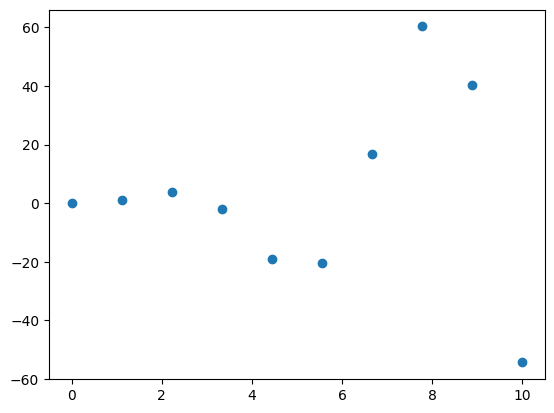

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)

# точечная диаграмма
plt.scatter(x, y)
plt.show()

In [89]:
from scipy.interpolate import interp1d

In [90]:
# по умлочинию линейная интерполяция
f = interp1d(x, y)

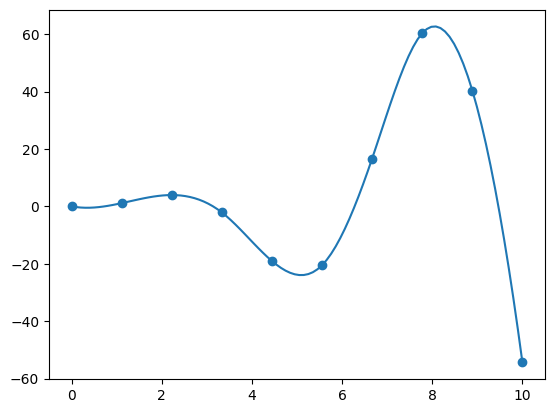

In [100]:
# что получилось?
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)

plt.plot(x_dense, y_dense)
plt.scatter(x, y)
plt.show()

In [101]:
f = interp1d(x, y, kind='cubic')

### Curve fitting

Может стоять другая задача:

* Известна "форма" данных
* Неизвестны только параметы

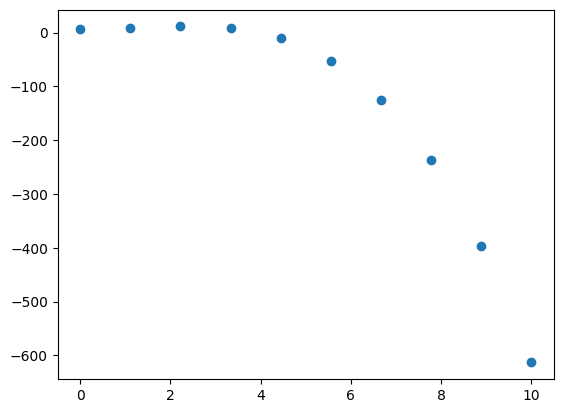

In [102]:
x_data = np.linspace(0, 10, 10)
y_data = -x**3 + 4 * x**2 - 2 * x + 7

plt.scatter(x_data, y_data)
plt.show()

In [94]:
from scipy.optimize import curve_fit

def func_cubic(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

Воспользуемся функцией __curve_fit__

передаём функцию, данные и начальное приближение

In [95]:
popt, pcov = curve_fit(func_cubic, x_data, y_data, p0=(-1.2, 2, 2, 3))
popt

array([-1.,  4., -2.,  7.])

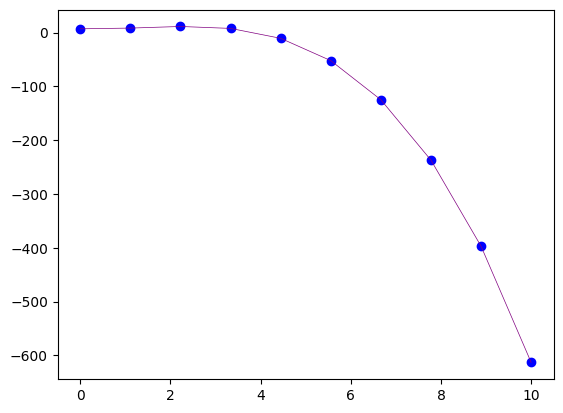

In [96]:
res_a, res_b, res_c, res_d = popt
y_fit = func_cubic(x_data, res_a, res_b, res_c, res_d)

plt.plot(x_data, y_fit, color='purple', lw=0.5)
plt.scatter(x_data, y_data, marker='o', c='blue')
plt.show()

### [Интегрирование](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html)   <a class="anchor" id="scipy_integrate"></a>


создать полином можно с помощью __poly1d__

в качестве аргумента можно передать коэффициенты (в порядке уменьшения степени)

In [ ]:
polynom = np.poly1d([4, 2, 1, 2])

In [ ]:
print(polynom)

Посчитаем неопределенный интеграл. Можно указывать 

* порядок (параметр $m$, по умолчанию 1) 
* константу (параметр $k$, по умолчанию None, т.е. добавится 0)


In [ ]:
polynom.integ(k = 5)

In [ ]:
print(polynom.integ(k = 5))

А если функция сложнее?

In [103]:
from scipy.integrate import quad, odeint
from scipy.special import erf

def f(x):
    return exp(-x**2)

Функция `quad`

```
Вычисляет определенный интеграл.

Integrate func from `a` to `b` (possibly infinite interval) using a technique from the Fortran library QUADPACK.
```

$$\int_{a}^{b} f(x) dx$$

Адаптивное численное интегрирование (может быть до бесконечности). 

In [ ]:
quad?

In [104]:
from numpy import exp,inf,sqrt,pi

In [105]:
res, err = quad(f, 0, np.inf)

print(f"Аналитический результат: {sqrt(pi)/2}.\nЧисленного интегрированиe: {res}.\nОшибка численного интегрирования: {err}")

Аналитический результат: 0.8862269254527579.
Численного интегрированиe: 0.8862269254527579.
Ошибка численного интегрирования: 7.101318529726462e-09


### Дифференциальные уравнения  <a class="anchor" id="scipy_odes"></a>
`odeint` - интегрирование системы ОДУ:

$$
\cfrac{d {\rm y}}{dt} = f ({\rm y}, t),
$$

где ${\rm y}(0) = y_0$, ${\rm y}$ - вектор длины $N$, $f: \mathbb{R}^N \rightarrow \mathbb{R}^N$

In [ ]:
odeint?

Уравнение движения маятника с учётом силы трения в шарнире и действия гравитации

$\theta''(t) + b\cdot\theta'(t) + c\cdot\sin(\theta(t)) = 0$, $b, c > 0$

Немного упростим

In [ ]:
a = 0.2
def f(x,t):
    global a
    return [x[1], -x[0]-2*a*x[1]]

In [ ]:
t = np.linspace(0, 10, 1000)
x = odeint(f,[1,0],t)
x

Теперь хотим простроить графики координаты и скорости!

In [ ]:
plt.plot(t, x)
# точное решение
b = np.sqrt(1 - a**2)
x0 = np.exp(-a*t)*(np.cos(b*t) + a/b*np.sin(b*t))

# максимальное отличие численного решения от точного
print(f"Ошибка: {abs(x[:,0] - x0).max()}")
plt.show()

### Опционально <a class="anchor" id="mpll_additional"></a>

Галерея matplotlib http://matplotlib.org/gallery.html  
Python scientific lecture notes https://scipy-lectures.github.io/  
http://matplotlib.org/examples/pie_and_polar_charts/polar_bar_demo.html